In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data=pd.read_csv('Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


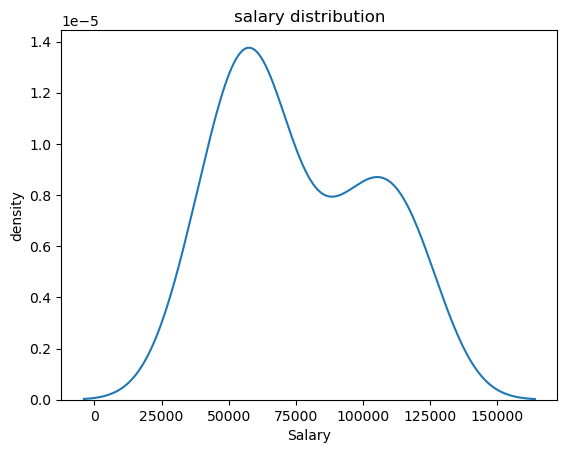

skewness for salary is :0.35411967922959153


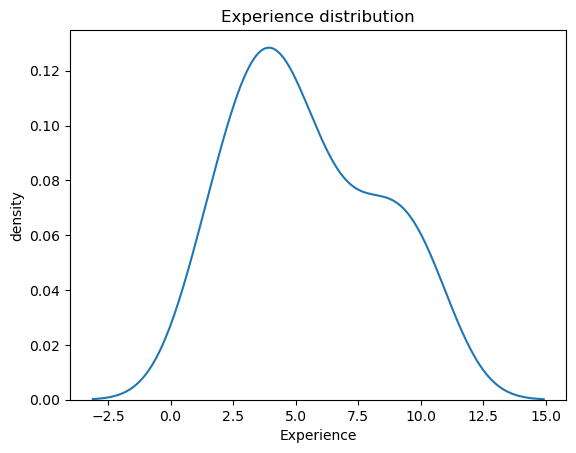

skewness for experience is :0.37956024064804234


In [12]:
sns.kdeplot(data['Salary'])
plt.xlabel('Salary')
plt.ylabel('density')
plt.title("salary distribution")
plt.show()
print(f"skewness for salary is :{data['Salary'].skew()}")
sns.kdeplot(data['YearsExperience'])
plt.xlabel('Experience')
plt.ylabel('density')
plt.title("Experience distribution")
plt.show()
print(f"skewness for experience is :{data['YearsExperience'].skew()}")

# skewness is small

# there is no use of unnamed column

In [13]:
data=data.drop("Unnamed: 0",axis=1)
print(data.head())

   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


# heat map

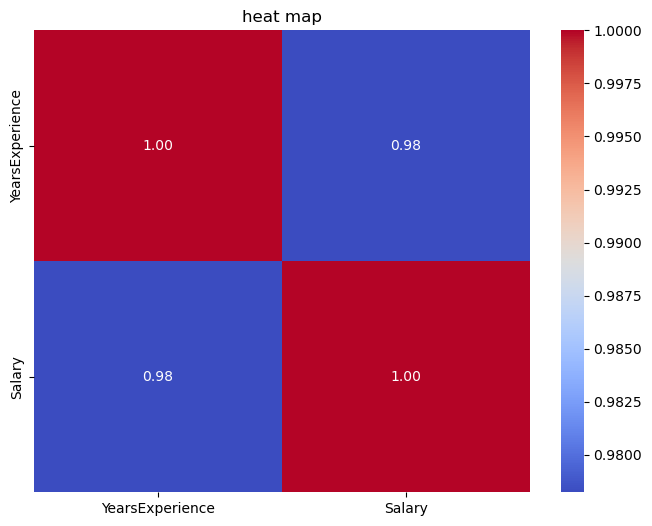

In [16]:
correlation_matrix=data.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.title("heat map")
plt.show()

In [17]:
linear_reg = LinearRegression()
train_x,test_x,train_y,test_y = train_test_split(data[['YearsExperience']], data['Salary'], test_size=0.2, random_state=42)
linear_reg.fit(train_x, train_y)
pred_y = linear_reg.predict(test_x)

In [23]:
predicted_value=linear_reg.predict(pd.DataFrame({'YearsExperience':[8]}))[0]
print(f"predicted salary for 8 years is {predicted_value} ")

predicted salary for 8 years is 99770.72406372153 


In [25]:
print("predicted value for zero years of experience")
print("intercept = ", linear_reg.intercept_)

predicted value for zero years of experience
intercept =  24380.20147947369


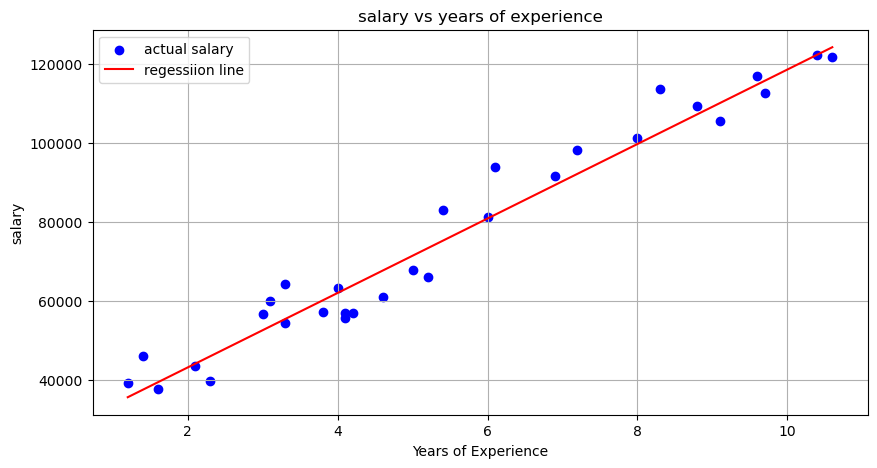

In [27]:
X=data["YearsExperience"]
Y=data["Salary"]
plt.figure(figsize=(10,5))
plt.scatter(X,Y,color='blue',label='actual salary')
plt.plot(X,linear_reg.predict(data[['YearsExperience']]),color='red',label='regessiion line')
plt.title('salary vs years of experience')
plt.xlabel('Years of Experience')
plt.ylabel("salary")
plt.legend()
plt.grid()
plt.show()